In [9]:
# Import necessary packages
import pandas as pd 
import csv
import os
import sys
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Notebook Functions')
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Global Functions')
from helper_functions import date_to_decimal_year, rain_predictor, grid_table, rain_table, volcano_rain_frame, data_cleaner, rain_combine, volcano_rain_frame
from plot_functions import eruption_counter, annual_plotter, bar_plotter, rain_averager, by_strength, grid_search, p_values, cutoff_grid, by_strength_all
from el_nino_functions import elnino_strengths, elnino_cleaner
import numpy as np

In [10]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/GALAPAGOS_DATA'

In [11]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "erupt_2024.csv"))

rain_sat = pd.read_csv(os.path.join(folder_path, "update_2024.csv"))
rain_ave_sat = pd.read_csv(os.path.join(folder_path, "isabela_2024.csv"))

rainfall1 = pd.concat([rain_sat, rain_ave_sat])

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [12]:
sites_dict = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.55, -.35, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul'), 'Isabela (all)': ('NaN', 'NaN', 'Isabela (all)')} # Long/lat pairs must exist in rainfall data
sites_dict2 = {'Isabela (all)': ('NaN', 'NaN', 'Isabela (all)')}
quantiles = 3 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
quant_range = [20, 25, 30, 35, 40, 45, 50]
roll_range = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]

log_flag = True # If true, applies a log scaling to the data
by_season = False # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range

compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
print_summary = False # Make true if you want to see summary of regression

# Uncomment below to use rain predictor gauge location. (For analyses of eruptions between 1964 and 2000)
rain_isabela = rain_combine(rain_ave_sat, sites_dict2, compare_site, rolling_number, print_summary=False, center=False)



0.16439999999988686 0.4985999999998967


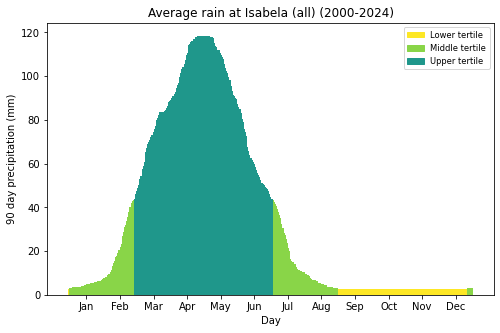

In [21]:
rainfall2 = volcano_rain_frame(rain_isabela[rain_isabela['Date'] <= '2000-05-31'], rolling_number)

rainfall3 = rain_averager(rain_isabela, sites_dict2, volcanic_events, quantiles, rolling_number)

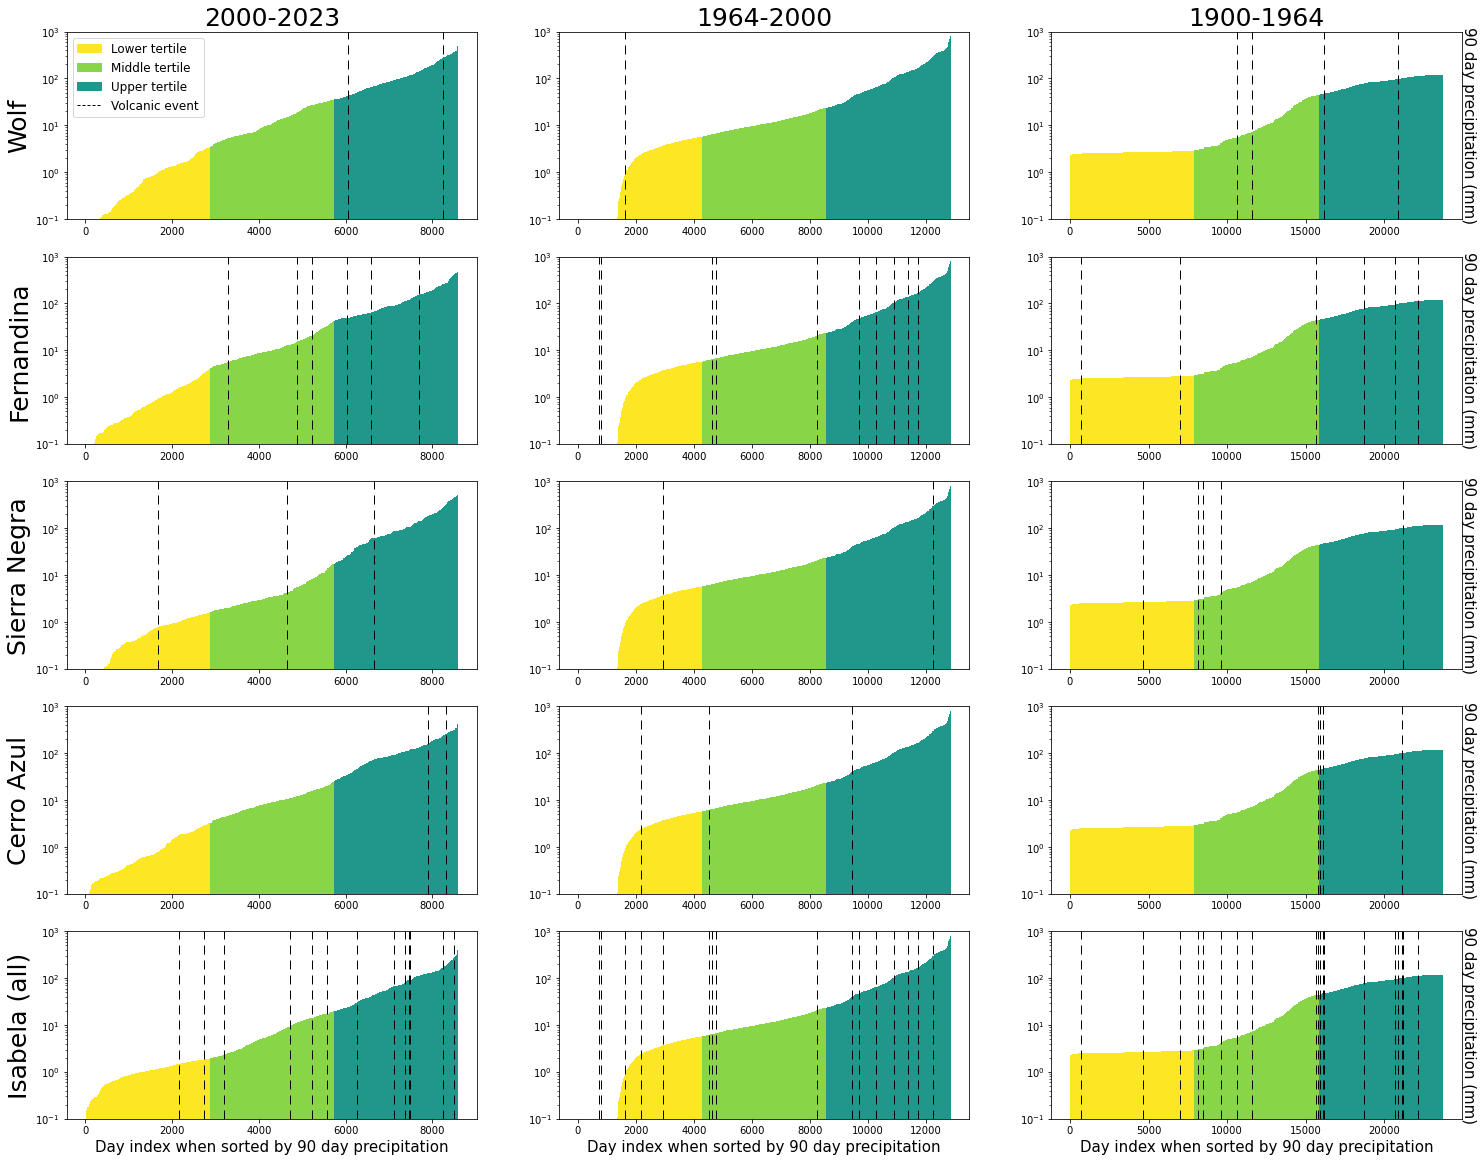

TypeError: cannot unpack non-iterable NoneType object

In [23]:
all_rain, event_rain = by_strength_all(sites_dict, volcanic_events, rainfall1, rainfall2, rainfall3, quantiles, rolling_number, log_flag, elninos=None, recur=False)